In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [15]:
digits = datasets.load_digits()
X = digits.images
y = digits.target

In [16]:
X = X / 16.0  # 원래 값 범위가 0~16 → 0~1로 정규화
y = to_categorical(y, 10)  # one-hot encoding (0~9 → [0,0,1,0,...])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
model = Sequential([
    Flatten(input_shape=(8, 8)),     # 8x8 이미지 → 64 벡터로 평탄화
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 숫자 0~9 → softmax
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
45/45 - 1s - 16ms/step - accuracy: 0.5393 - loss: 1.8987
Epoch 2/20
45/45 - 0s - 2ms/step - accuracy: 0.8720 - loss: 0.8798
Epoch 3/20
45/45 - 0s - 2ms/step - accuracy: 0.9186 - loss: 0.3791
Epoch 4/20
45/45 - 0s - 2ms/step - accuracy: 0.9485 - loss: 0.2401
Epoch 5/20
45/45 - 0s - 2ms/step - accuracy: 0.9527 - loss: 0.1851
Epoch 6/20
45/45 - 0s - 2ms/step - accuracy: 0.9666 - loss: 0.1433
Epoch 7/20
45/45 - 0s - 2ms/step - accuracy: 0.9729 - loss: 0.1177
Epoch 8/20
45/45 - 0s - 2ms/step - accuracy: 0.9749 - loss: 0.1046
Epoch 9/20
45/45 - 0s - 2ms/step - accuracy: 0.9791 - loss: 0.0899
Epoch 10/20
45/45 - 0s - 2ms/step - accuracy: 0.9798 - loss: 0.0806
Epoch 11/20
45/45 - 0s - 2ms/step - accuracy: 0.9805 - loss: 0.0728
Epoch 12/20
45/45 - 0s - 2ms/step - accuracy: 0.9833 - loss: 0.0654
Epoch 13/20
45/45 - 0s - 2ms/step - accuracy: 0.9896 - loss: 0.0536
Epoch 14/20
45/45 - 0s - 2ms/step - accuracy: 0.9896 - loss: 0.0515
Epoch 15/20
45/45 - 0s - 2ms/step - accuracy: 0.9923 - l

In [20]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 정확도: {accuracy}")

테스트 정확도: 0.9666666388511658


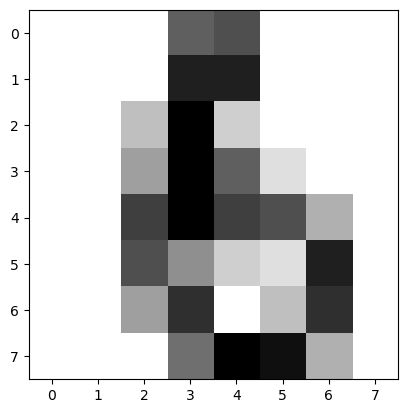

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
예측한 숫자: 6


In [21]:
sample = X_test[10]
plt.imshow(sample, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

sample_input = sample.reshape(1, 8, 8)
prediction = model.predict(sample_input)
predicted_label = prediction.argmax()
print(f"예측한 숫자: {predicted_label}")